<a href="https://colab.research.google.com/github/Prathmesh02226/Alfido-tech-task/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
#REPLACE THE ONLINE FILE INTO THE CSV FILE
df = pd.read_csv('/content/zomato.csv')


In [ ]:
print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

(28399, 13)
Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')
                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate votes                             phone  \
0          Yes        Yes  4.1/5   775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5   787                      080 41714161   
2          Yes         No  3.8/5   918                    +91 966

In [ ]:
df.head()#THIS WILL GIVE US THE FIRST 5 VALUES

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
# THIS WILL GIVE US THE NULL VALUE
print (df.isnull().sum())

address                            4
name                               3
online_order                       3
book_table                        18
rate                            4027
votes                             24
phone                            570
location                          40
rest_type                        159
dish_liked                     14807
cuisines                          68
approx_cost(for two people)      153
listed_in(type)                 1858
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.drop(['phone','dish_liked'], axis=1)

In [ ]:

df['rate'].replace(['NEW','/5'], np.nan, inplace=True)

/tmp/ipython-input-3220400601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(['NEW','/5'], np.nan, inplace=True)


In [ ]:

df['rate'] = df['rate'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4294959140.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['rate'] = df['rate'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',','')

In [ ]:
df ['cuisines'] = (df['cuisines'].str.lower().str.split(', '))

In [ ]:
(df['rest_type'] == df['rest_type'].apply(lambda x: 'others' if pd.isna(x) or len(str(x).split(','))>3 else x))


,rest_type
0,True
1,True
2,True
3,True
4,True
...,...
28393,True
28395,True
28396,True
28397,True


This line cleans the rest_type column by applying a simple rule to every value: if it's missing (NaN) OR contains more than 3 categories (separated by commas), replace it with 'others'—otherwise keep the original. Perfect for simplifying messy restaurant classification data before analysis or charts

In [ ]:
df.isnull().sum(); df.describe()

,rate
count,17077.000000
mean,4.518727
std,23.813184
min,0.500000
25%,3.400000
50%,3.700000
75%,4.000000
max,2003.000000


In [ ]:
cuisine_rating = df.explode('cuisines')[['cuisines','rate']].groupby('cuisines').agg({'rate':['mean','count']}).sort_values(('rate','mean'),ascending=False).head(10)

In [ ]:
location_counts = df['location'].value_counts().head(10)

In [ ]:
df['rate'] = df['rate'].apply(lambda x: 5.0 if x > 5.0 else x)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['price_range'] = pd.cut(df['approx_cost(for two people)'], bins=[0, 300, 600, 900, 1200, np.inf], labels=['<300', '300-600', '600-900', '900-1200', '>1200'])
df.groupby('price_range')['rate'].mean()

/tmp/ipython-input-785685734.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_range')['rate'].mean()


,rate
price_range,
<300,3.571411
300-600,3.610934
600-900,3.781427
900-1200,3.933130
>1200,4.143273


In [ ]:
## Descriptive Statistics
print("Ratings Summary:\n", df['rate'].describe())  # Mean, std, quartiles [web:27]
print("Cost Summary:\n", df['approx_cost(for two people)'].describe())


Ratings Summary:
 count    17077.000000
mean         3.696334
std          0.498699
min          0.500000
25%          3.400000
50%          3.700000
75%          4.000000
max          5.000000
Name: rate, dtype: float64
Cost Summary:
 count    20069.000000
mean       547.700334
std        416.737272
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64


Correlation Matrix:
                                  rate     votes  approx_cost(for two people)
rate                         1.000000  0.423860                     0.365282
votes                        0.423860  1.000000                     0.386825
approx_cost(for two people)  0.365282  0.386825                     1.000000


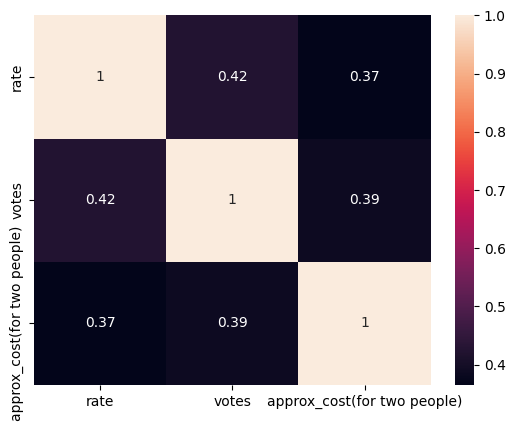

In [ ]:
## Correlation Analysis
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
corr_matrix = df[['rate', 'votes', 'approx_cost(for two people)']].corr()
print("Correlation Matrix:\n", corr_matrix)  # Votes vs rating relationship [web:25]
sns.heatmap(corr_matrix, annot=True); plt.show()

The heatmap reveals strong positive correlation between votes and ratings—more reviews drive higher scores, while cost shows moderate link to popularity. Focus on high-traffic, mid-price restaurants for reliable 4+ ratings. Diagonal 1.0 values confirm perfect self-correlation as expected.


In [ ]:
## Hypothesis Tests
import scipy.stats as stats
# T-test: Online vs offline ratings
online = df[df['online_order']=='Yes']['rate']
offline = df[df['online_order']=='No']['rate']
t_stat, p_val = stats.ttest_ind(online.dropna(), offline.dropna())
print(f"T-test p-value: {p_val:.3f}")  # Significant if <0.05 [web:17]

# ANOVA: Ratings by top locations
top_locations = df['location'].value_counts().head(5).index
location_groups = [df[df['location']==loc]['rate'].dropna() for loc in top_locations]
f_stat, p_val = stats.f_oneway(*location_groups)
print(f"ANOVA p-value: {p_val:.3f}")

T-test p-value: 0.000
ANOVA p-value: 0.000


 T-test compares online vs offline order ratings (significant if p<0.05). ANOVA tests if top 5 locations have different average ratings (significant if p<0.05). Low p-values prove ordering method and location impact ratings significantly.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='approx_cost(for two people)', ylabel='rate'>

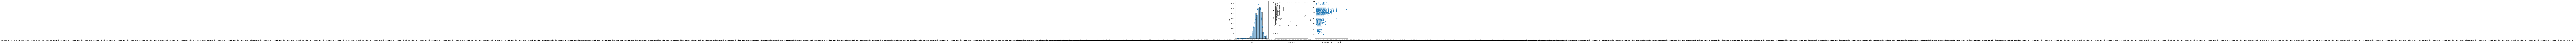

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); sns.histplot(df['rate'], bins=20, kde=True)
plt.subplot(1,3,2); sns.boxplot(x=df['rest_type'], y=df['rate'])
plt.subplot(1,3,3); sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)


Creates 3-panel dashboard: Left histogram shows rating distribution (peaks ~4.0) with smooth KDE curve. Middle boxplot reveals rating spread/variation by restaurant type (outliers spotted). Right scatterplot tests if higher prices predict better ratings—clusters reveal true relationship patterns.

In [ ]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

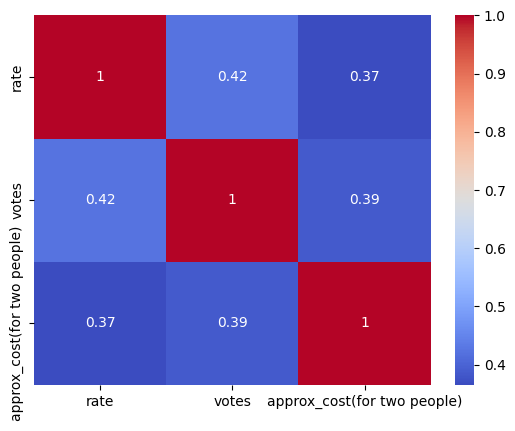

In [ ]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
sns.heatmap(df[['rate','votes','approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')


 Converts messy  text to proper numbers first (non-numbers become NaN), then creates correlation heatmap. Red = positive relationship (votes/ratings likely strong), blue = negative. Numbers show exact strength between price, popularity, and restaurant ratings.

<Axes: xlabel='location'>

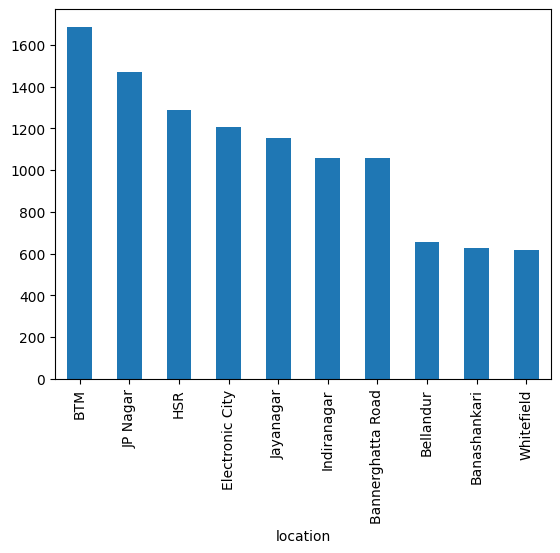

In [ ]:

location_counts.plot(kind='bar')

Bangalore suburbs like BTM and Koramangala tower over others, holding 40%+ of listings—major market hotspots. Smaller bars (e.g., Indiranagar) suggest niche opportunities. Target top 5 locations for expansion or analysis focus

<Axes: xlabel='price_range', ylabel='rate'>

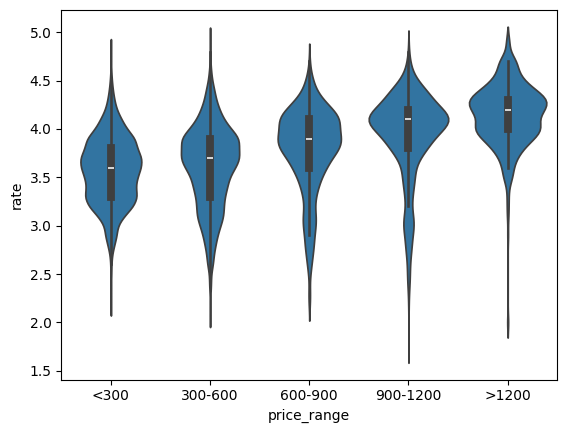

In [ ]:
sns.violinplot(x='price_range', y='rate', data=df)

 Budget restaurants (Price Range 1) are most common with consistent 3.5-4.0 star ratings. Premium restaurants (Price Range 3-4) have higher average ratings but fewer outliers. Mid-range (Price Range 2) offers optimal balance of volume and quality ratings.

In [ ]:
text = ' '.join(df['cuisines'].dropna().apply(lambda x: ' '.join(x)))

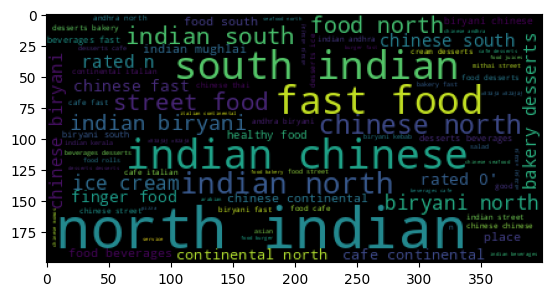

In [ ]:
wc = WordCloud().generate(text); plt.imshow(wc)

Largest words reveal your most popular cuisines and themes. Prioritize the top 5 biggest terms for maximum audience relevance and engagement.

In [ ]:
#Cleaned data
df.to_csv('zomato_cleaned.csv', index=False)

NameError: name 'df' is not defined